#### Copyright 2019 Google LLC.

In [31]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Regression Project

## Overview

### Learning Objectives

* Apply scikit-learn or TensorFlow to a dataset to create a regression model.
* Preprocess data for feeding into a model.
* Use a hand-built model to make predictions.
* Measure the quality of predictions from your model.

### Prerequisites

* Introduction to Colab
* Intermediate Python
* Intermediate Pandas
* Visualizations
* Regression
* Regression with scikit-learn
* Regression with TensorFlow

# Exercises

## Exercise 1: Coding

[Kaggle](http://www.kaggle.com) hosts a [dataset containing intake and outcome data](https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes) for the [Austin Animal Care Shelter](http://www.austintexas.gov/department/aac). In this project we will **use intake data to predict the number of days that an animal is likely to stay in the shelter before being adopted**.

You are free to use any toolkit that we have covered in this class to solve the problem. That should be at least scikit-learn and TensorFlow.

Important details:

* The [dataset](https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes) offers three files, one for intakes, one for outcomes, and one that joins the two and adds some additional columns. Feel free to use any combination of the files.
* The column we are trying to predict is 'time_in_shelter_days'.
* Do not use any outcome data as features for training the model. We want to be able to predict the time in shelter for any given animal at intake.
* Not all animals have outcomes. Not all outcomes are adoption.

**Graded** demonstrations of competency:
1. Get the data into a Python object.
1. The ability to examine the data programmatically and visually.
1. Perform at least one preprocessing transformation on the data.
1. Creation and training of a regression model.
1. Testing and/or scoring of a model.
1. Model experimentation and tuning: record parameters and objects used along with resulting scores.

### Student Solution

In [32]:
import altair as alt
import numpy as np 
import pandas as pd
import math
import matplotlib
import matplotlib.pyplot as plt
import re
import seaborn as sns

filename = './aac_intakes.csv'
aac_intake = pd.read_csv(filename)

filename = './aac_intakes_outcomes.csv'
aac_outake = pd.read_csv(filename)


In [33]:
aac_intake.describe()

,age_upon_intake,animal_id,animal_type,breed,color,datetime,datetime2,found_location,intake_condition,intake_type,name,sex_upon_intake
count,80187,80187,80187,80187,80187,80187,80187,80187,80187,80187,55603,80186
unique,46,72365,5,2166,529,57055,57055,36772,8,5,14731,5
top,1 year,A721033,Dog,Domestic Shorthair Mix,Black/White,2016-09-23T12:00:00.000,2016-09-23T12:00:00.000,Austin (TX),Normal,Stray,Bella,Intact Male
freq,14672,13,45743,23519,8340,64,64,14443,70520,56280,357,25488


In [34]:
aac_outake.describe()

,age_upon_outcome_(days),age_upon_outcome_(years),outcome_month,outcome_year,outcome_hour,outcome_number,dob_year,dob_month,count,age_upon_intake_(days),age_upon_intake_(years),intake_month,intake_year,intake_hour,intake_number,time_in_shelter_days
count,79672.000000,79672.000000,79672.000000,79672.000000,79672.000000,79672.000000,79672.000000,79672.000000,79672.0,79672.000000,79672.000000,79672.000000,79672.000000,79672.000000,79672.000000,79672.000000
mean,782.046127,2.142592,6.655425,2015.472563,14.297306,1.126820,2013.254870,6.310310,1.0,769.341701,2.107785,6.584032,2015.436101,13.487022,1.126820,16.757116
std,1058.528519,2.900078,3.414284,1.305944,3.774317,0.456057,3.216517,3.289077,0.0,1056.009040,2.893175,3.366579,1.303157,3.121173,0.456057,41.679359
min,0.000000,0.000000,1.000000,2013.000000,0.000000,1.000000,1991.000000,1.000000,1.0,0.000000,0.000000,1.000000,2013.000000,0.000000,1.000000,0.000000
25%,90.000000,0.246575,4.000000,2014.000000,12.000000,1.000000,2012.000000,4.000000,1.0,60.000000,0.164384,4.000000,2014.000000,11.000000,1.000000,1.102083
50%,365.000000,1.000000,7.000000,2015.000000,15.000000,1.000000,2014.000000,6.000000,1.0,365.000000,1.000000,7.000000,2015.000000,13.000000,1.000000,4.987153
75%,1095.000000,3.000000,10.000000,2017.000000,17.000000,1.000000,2015.000000,9.000000,1.0,1095.000000,3.000000,10.000000,2017.000000,16.000000,1.000000,13.610764
max,9125.000000,25.000000,12.000000,2018.000000,23.000000,13.000000,2018.000000,12.000000,1.0,9125.000000,25.000000,12.000000,2018.000000,23.000000,13.000000,1606.194444


In [35]:
aac_intake.head()

,age_upon_intake,animal_id,animal_type,breed,color,datetime,datetime2,found_location,intake_condition,intake_type,name,sex_upon_intake
0,8 years,A706918,Dog,English Springer Spaniel,White/Liver,2015-07-05T12:59:00.000,2015-07-05T12:59:00.000,9409 Bluegrass Dr in Austin (TX),Normal,Stray,Belle,Spayed Female
1,11 months,A724273,Dog,Basenji Mix,Sable/White,2016-04-14T18:43:00.000,2016-04-14T18:43:00.000,2818 Palomino Trail in Austin (TX),Normal,Stray,Runster,Intact Male
2,4 weeks,A665644,Cat,Domestic Shorthair Mix,Calico,2013-10-21T07:59:00.000,2013-10-21T07:59:00.000,Austin (TX),Sick,Stray,NaN,Intact Female
3,4 years,A682524,Dog,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,2014-06-29T10:38:00.000,2014-06-29T10:38:00.000,800 Grove Blvd in Austin (TX),Normal,Stray,Rio,Neutered Male
4,2 years,A743852,Dog,Labrador Retriever Mix,Chocolate,2017-02-18T12:46:00.000,2017-02-18T12:46:00.000,Austin (TX),Normal,Owner Surrender,Odin,Neutered Male


In [36]:
aac_outake.head()

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,...,age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
0,10 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,3650,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,...,"(7.5, 10.0]",2017-12-07 00:00:00,12,2017,2017-12,Thursday,14,1.0,0 days 14:07:00.000000000,0.588194
1,7 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2555,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,...,"(5.0, 7.5]",2014-12-19 10:21:00,12,2014,2014-12,Friday,10,2.0,1 days 06:14:00.000000000,1.259722
2,6 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2190,6.0,"(5.0, 7.5]",2014-03-08 17:10:00,...,"(5.0, 7.5]",2014-03-07 14:26:00,3,2014,2014-03,Friday,14,3.0,1 days 02:44:00.000000000,1.113889
3,10 years,A047759,2004-04-02 00:00:00,Partner,Transfer,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,...,"(7.5, 10.0]",2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139
4,16 years,A134067,1997-10-16 00:00:00,NaN,Return to Owner,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,...,"(15.0, 17.5]",2013-11-16 09:02:00,11,2013,2013-11,Saturday,9,1.0,0 days 02:52:00.000000000,0.119444


In [37]:
aac_intake.columns

Index(['age_upon_intake', 'animal_id', 'animal_type', 'breed', 'color',
       'datetime', 'datetime2', 'found_location', 'intake_condition',
       'intake_type', 'name', 'sex_upon_intake'],
      dtype='object')

In [38]:
aac_intake.dtypes

age_upon_intake     object
animal_id           object
animal_type         object
breed               object
color               object
datetime            object
datetime2           object
found_location      object
intake_condition    object
intake_type         object
name                object
sex_upon_intake     object
dtype: object

In [39]:
aac_outake.dtypes

age_upon_outcome               object
animal_id_outcome              object
date_of_birth                  object
outcome_subtype                object
outcome_type                   object
sex_upon_outcome               object
age_upon_outcome_(days)         int64
age_upon_outcome_(years)      float64
age_upon_outcome_age_group     object
outcome_datetime               object
outcome_month                   int64
outcome_year                    int64
outcome_monthyear              object
outcome_weekday                object
outcome_hour                    int64
outcome_number                float64
dob_year                        int64
dob_month                       int64
dob_monthyear                  object
age_upon_intake                object
animal_id_intake               object
animal_type                    object
breed                          object
color                          object
found_location                 object
intake_condition               object
intake_type 

# Exam the data

Check for null values

In [40]:
n = len(aac_intake)
print("age_upon_intake: "+ str(n-aac_intake['age_upon_intake'].isnull().value_counts().values.tolist()[0]))
print("animal_type: "+str(n-aac_intake['animal_type'].isnull().value_counts().values.tolist()[0]))
print("intake_condition: "+ str(n-aac_intake['intake_condition'].isnull().value_counts().values.tolist()[0]))
print("intake_type: "+str(n-aac_intake['intake_type'].isnull().value_counts().values.tolist()[0]))
print("datetime: "+str(n-aac_intake['datetime'].isnull().value_counts().values.tolist()[0]))

age_upon_intake: 0
animal_type: 0
intake_condition: 0
intake_type: 0
datetime: 0


In [41]:
n = len(aac_outake)
print("time_in_shelter_days: "+str(n-aac_outake['time_in_shelter_days'].isnull().value_counts().values.tolist()[0]))
print("age_upon_intake_(years): "+str(n-aac_outake['age_upon_intake_(years)'].isnull().value_counts().values.tolist()[0]))
print("age_upon_intake_(years): "+str(n-aac_outake['age_upon_intake_(days)'].isnull().value_counts().values.tolist()[0]))

time_in_shelter_days: 0
age_upon_intake_(years): 0
age_upon_intake_(years): 0


# Data Preprocssing 

Unify age upon intake to days

In [42]:
def change_intake_age(i):
  i,j = i.split()
  if 'day' in j:
    k = int(i)
  elif 'week' in j:
    k = int(i)*7
  elif 'month' in j:
    k = int(i)*30
  elif 'year' in j:
    k = int(i)*365
  return k

aac_intake['age_upon_intake'] = aac_intake['age_upon_intake'].apply(lambda x: change_intake_age(x))
# aac_outake['age_upon_intake'] = aac_outake['age_upon_intake'].apply(lambda x: change_intake_age(x))
 

Unify age upon intake to months

In [43]:
filename = './aac_intakes.csv'
aac_intake = pd.read_csv(filename)

filename = './aac_intakes_outcomes.csv'
aac_outake = pd.read_csv(filename)

def change_intake_age_month(i):
  i,j = i.split()
  if 'day' in j:
    k = float(i)/30
  elif 'week' in j:
    k = float(i)/4
  elif 'month' in j:
    k = float(i)
  elif 'year' in j:
    k = float(i)*12
  return k

# aac_intake['age_upon_intake'] = aac_intake['age_upon_intake'].apply(lambda x: change_intake_age(x))
aac_outake['age_upon_intake'] = aac_outake['age_upon_intake'].apply(lambda x: change_intake_age_month(x))
 

# Data Visualization

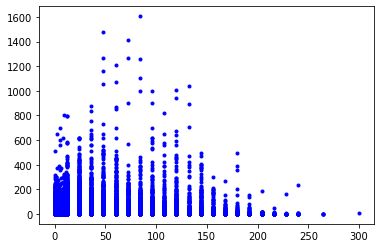

In [44]:
plt.plot(aac_outake['age_upon_intake'],aac_outake['time_in_shelter_days'],'b.')

animal_type Unique Values :  ['Bird' 'Cat' 'Dog' 'Livestock' 'Other']
animal_type Occurrence Count :  [  342 29659 45743     9  4434]


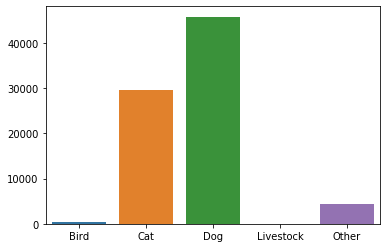

In [45]:
animal_type_uniqueValues, animal_type_occurCount = np.unique(aac_intake.animal_type, return_counts=True)
print("animal_type Unique Values : " , animal_type_uniqueValues)
print("animal_type Occurrence Count : ", animal_type_occurCount)
sns.barplot(animal_type_uniqueValues, animal_type_occurCount)

In [47]:
intake_condition_uniqueValues, intake_condition_occurCount = np.unique(aac_intake.intake_condition, return_counts=True)
print("intake_condition Unique Values : " , intake_condition_uniqueValues)
print("intake_condition Occurrence Count : ", intake_condition_occurCount)
# intake_condition_plot = sns.barplot(intake_condition_uniqueValues,intake_condition_occurCount)

intake_condition Unique Values :  ['Aged' 'Feral' 'Injured' 'Normal' 'Nursing' 'Other' 'Pregnant' 'Sick']
intake_condition Occurrence Count :  [  322    92  4023 70520  1925   149    49  3107]


In [48]:
intake_type_uniqueValues, intake_type_occurCount = np.unique(aac_intake.intake_type, return_counts=True)
print("intake_type Unique Values : " , intake_type_uniqueValues)
print("intake_type Occurrence Count : ", intake_type_occurCount)
# intake_type_plot = sns.barplot(intake_type_uniqueValues, intake_type_occurCount)
# intake_type_plot.set_xticklabels(intake_type.get_xticklabels(),rotation=45)

intake_type Unique Values :  ['Euthanasia Request' 'Owner Surrender' 'Public Assist' 'Stray' 'Wildlife']
intake_type Occurrence Count :  [  251 15156  5033 56280  3467]


Convert DateTime to only month

In [49]:
aac_intake.datetime = aac_intake.datetime.apply(lambda x:int(x.split('-')[1])) 

In [50]:
datetime_uniqueValues, datetime_occurCount = np.unique(aac_intake.datetime, return_counts=True)
print("datetime Unique Values : " , datetime_uniqueValues)
print("datetime Occurrence Count : ", datetime_occurCount)
# datetime_plot = sns.barplot(datetime_uniqueValues, datetime_occurCount)

datetime Unique Values :  [ 1  2  3  4  5  6  7  8  9 10 11 12]
datetime Occurrence Count :  [6025 5750 6842 6119 7976 7473 6550 6511 6507 7674 6629 6131]


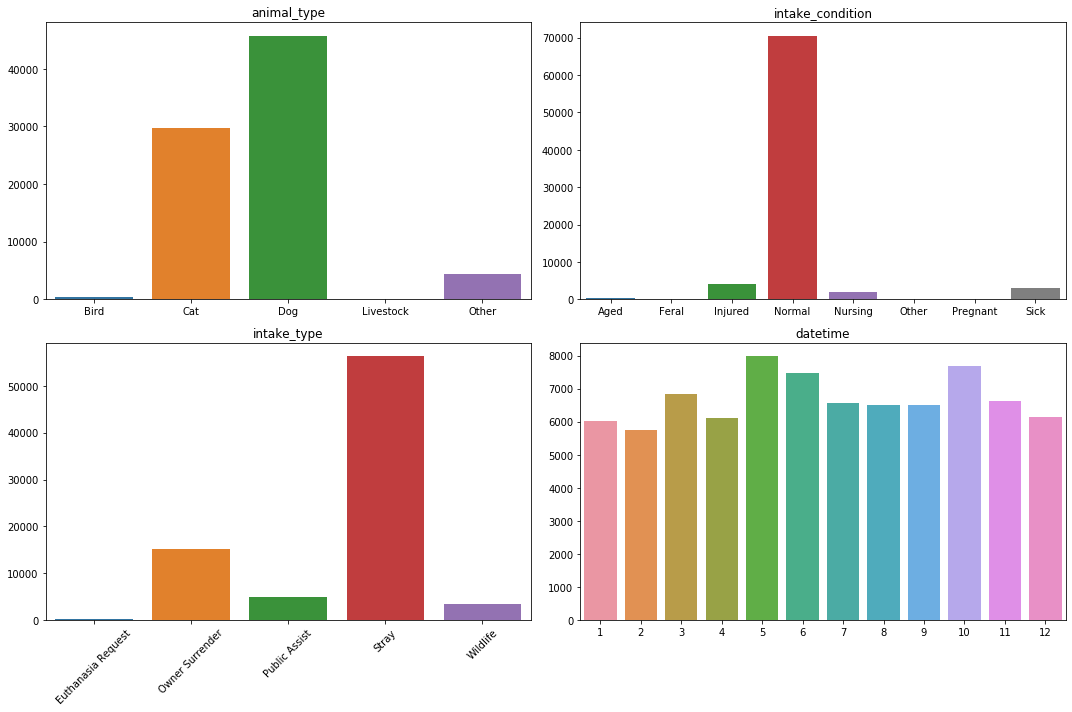

In [51]:
f, axes = plt.subplots(2, 2,figsize=(15,10))
sns.barplot(animal_type_uniqueValues, animal_type_occurCount,ax=axes[0,0])
axes[0,0].title.set_text("animal_type") 
sns.barplot(intake_condition_uniqueValues,intake_condition_occurCount,ax = axes[0,1])
axes[0,1].title.set_text("intake_condition") 
sns.barplot(intake_type_uniqueValues, intake_type_occurCount,ax = axes[1,0])
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(),rotation=45)
axes[1,0].title.set_text("intake_type")
sns.barplot(datetime_uniqueValues, datetime_occurCount,ax = axes[1,1])
axes[1,1].title.set_text("datetime")
plt.tight_layout()

# Convert String columns to useful numeric features

Convert intake_condition to scale 0-10

In [52]:
aac_outake["intake_condition"].value_counts()

Normal      70056
Injured      3997
Sick         3099
Nursing      1915
Aged          319
Other         147
Feral          92
Pregnant       47
Name: intake_condition, dtype: int64

In [53]:
intake_condition_nums = {"Normal": 10, "Injured": 8, "Sick": 6, "Nursing": 7,
                                  "Aged": 9, "Other": 3, "Feral":2,"Pregnant":5}
aac_outake.intake_condition.replace(intake_condition_nums, inplace=True)

Convert intake_type to scale 1-5

In [54]:
aac_outake.intake_type.value_counts()

Stray                 55935
Owner Surrender       15028
Public Assist          4994
Wildlife               3464
Euthanasia Request      251
Name: intake_type, dtype: int64

In [55]:
intake_type_nums = {"Stray": 3, "Owner Surrender": 4, "Public Assist": 5, "Wildlife": 2,
                                  "Euthanasia Request": 1}
aac_outake.intake_type.replace(intake_type_nums, inplace=True)

Convert animal_type to scale 0-5

In [56]:
aac_outake.animal_type.value_counts()

Dog      45366
Cat      29539
Other     4428
Bird       339
Name: animal_type, dtype: int64

In [57]:
animal_type_nums = {"Dog": 3, "Cat": 4, "Other": 0, "Bird": 1}
aac_outake.animal_type.replace(animal_type_nums, inplace=True)

# Train Model

**Linear Regression model**

Use age_upon_intake_(days), intake_condition, intake_type, animal_type as features

In [58]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(
    aac_outake[['age_upon_intake_(days)','intake_condition','intake_type','animal_type']], 
                                                aac_outake['time_in_shelter_days'],
                                                test_size = 0.2, random_state = 0)

Train the model

In [59]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize = True)
lin_reg.fit(xTrain, yTrain)
lin_reg.coef_, lin_reg.intercept_


(array([ 1.46422852e-03, -5.08748992e-01,  2.49555996e+00,  3.72259596e+00]),
 0.5522524022388993)

Score the model

In [60]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# rmse for test data
days_predict = lin_reg.predict(xTest)
rmse = sqrt(mean_squared_error(yTest, days_predict))
rmse

39.88665993551416

In [61]:
days_predict.mean()

16.8146413420577

In [62]:
# rmse for whole data
days_predict = lin_reg.predict(aac_outake[['age_upon_intake_(days)','intake_condition','intake_type','animal_type']])
rmse = sqrt(mean_squared_error(aac_outake['time_in_shelter_days'], days_predict))
rmse

41.452278095879365

In [63]:
lin_reg.score(aac_outake[['age_upon_intake_(days)','intake_condition','intake_type','animal_type']],aac_outake['time_in_shelter_days'])

0.010854483198980303

**SGD Regression**

Use age_upon_intake_(days), intake_condition, intake_type, animal_type as features

In [64]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(
    aac_outake[['age_upon_intake_(years)','intake_condition','intake_type','animal_type']], 
                                                aac_outake['time_in_shelter_days'],
                                                test_size = 0.2, random_state = 0)

Train the model

In [65]:
from sklearn.linear_model import SGDRegressor

# Create a new Stochastic Gradient Descent regressor
sgd_reg = SGDRegressor(max_iter = 17)

# Fit the model
sgd_reg.fit(xTrain, yTrain)

# Display the slope and intercept
sgd_reg.coef_, sgd_reg.intercept_

/Users/dorishuang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


(array([ 0.50530706, -0.69279282,  2.72737136,  3.32208095]),
 array([0.57750425]))

Score the model

In [66]:
# rmse for test data
days_predict = sgd_reg.predict(xTest)
rmse = sqrt(mean_squared_error(yTest, days_predict))
rmse

39.94404679927023

In [67]:
# rmse for whole data
days_predict = sgd_reg.predict(aac_outake[['age_upon_intake_(years)','intake_condition','intake_type','animal_type']])
rmse = sqrt(mean_squared_error(aac_outake['time_in_shelter_days'], days_predict))
rmse

41.517608456934894

In [68]:
sgd_reg.score(aac_outake[['age_upon_intake_(years)','intake_condition','intake_type','animal_type']],aac_outake['time_in_shelter_days'])

0.007734164631395869

**Iterations**

Record different attempts at model configurations here:

| Model                        | Parameters                | Score         |
|------------------------------|---------------------------|---------------|
| sklearn LinearRegressor      | none                      | R^2 = 0.010854 |
| sklearn SGDRegressor         |max_iter = 17 | R^2 = 0.010355 |

## Exercise 2: Ethical Implications

Even the most basic of models have the potential to affect segments of the population in different ways. It is important to consider how your model might positively and negative effect different types of users.

In this section of the project you will reflect on the positive and negative implications of your model.

### Student Solution

**Positive Impact**

Your model is trying to solve a problem. Think about who will benefit from that problem being solved and write a brief narrative about how the model will help.

---

Animals who are less likely to be adopted could benefit from our model. Our model shows that animals might be more likely to be discriminated against because of their age, condition and type upon entering the shelter. By highlighting discrimination, staff can take appropriate measures to promote the adoption of animals that might spend more time in the shelter than their counterparts.

**Negative Impact**

Models don't often have universal benefit. Think about who might be negatively impacted by the predictions your model is making. This person or persons might not be directly using the model, but instead might be impacted indirectly.

---

Animals with a normal intake condition might be less likely to be adopted due to our model. This is because our model uses an arbitrary scale that rates the normal intake condition higher than all other conditions. Therefore, the shelter staff may make less of an effort to promote the adoption of animals in this group.

**Bias**

Models can be bias for many reasons. The bias can come from the data used to build the model (eg. sampling, data collection methods, available sources) and from the interpretation of the predictions generated by the model.

Think of at least two ways that bias might have been introduced to your model and explain both below.

---

One way bias might have been introduced to our model would be through the scale we used for intake condition:

![alt text](https://i.imgur.com/LOiybJ8.png)

This scale introduces experimenter's bias because it assigns values to arbitrary categories.

Another way bias might have been introduced to our model would be through the arbitrary scale we used for intake type:

![alt text](https://i.imgur.com/kTWIAIk.png)

This scale also introduces experimenter's bias because it assigns values to arbitrary categories.

**Changing the Dataset to Mitigate Bias**

Bias datasets are one of the primary ways in which bias is introduced to a machine learning model. Look back at the input data that you fed to your model. Think about how you might change something about the data to reduce bias in your model.

What change or changes could you make to your dataset less bias? Consider the data that you have, how and where that data was collected, and what other sources of data might be used to reduce bias.

Write a summary of change that could be made to your input data.

---

Since the data has potential reporting bias, we could change the column for intake condition. This is because it could be the case that only apparently sick animals would be recorded with the sick condition, which might result in false negatives for animals who appear normal despite being verifiably sick. Instead, the column could account for the animal's percieved appearance.

**Changing the Model to Mitigate Bias**

Is there any way to reduce bias by changing the model itself? This could include modifying algorithmic choices, tweaking hyperparameters, etc.

Write a brief summary of changes that you could make to help reduce bias in your model.

---

Since the model has potential experimenter's bias, we could remove the abitrary scales we used for intake type and intake condition. Instead, we could rely strictly on naturally numeric data such as datetime or age upon intake.

**Mitigating Bias Downstream**

Models make predictions. Downstream processes make decisions. What processes and/or rules should be in place for people and systems interpreting and acting on the results of your model to reduce the bias? Describe these below.

---

People and systems interpreting and acting on the results of our model should make it a rule to evenly promote the adoption of all shelter animals regardless of the scales our model used for intake condition and intake type.